In [1]:
import pandas as pd
tweet_stimulus = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/stimulus.csv"), index_col=0)

In [2]:
tweet_stimulus.head()

,id,created_at,full_text,Sentiment,SentimentClass
0,1330775252339572737,2020-11-23 07:28:39,pandemic stimulus: cancel student loans by exe...,0.000000,Neutral
1,1330775251664429061,2020-11-23 07:28:39,repmichaelwaltz senrickscott spaceforcedod ...,0.000000,Neutral
2,1330775152179752964,2020-11-23 07:28:15,senrickscott america stimulus now . mil...,0.068182,Positive
3,1330775041685020672,2020-11-23 07:27:49,markets move higher as investors eye the ele...,0.250000,Positive
4,1330775013746733057,2020-11-23 07:27:42,"aerosol may not be good for the environment, b...",0.600000,Positive


In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = stopwords.words("english")

print((tweet_stimulus['full_text']).head())
print('-------Remove Stop Word------')
tweet_stimulus['StopWords'] = tweet_stimulus['full_text'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print((tweet_stimulus['StopWords']).head())

0    pandemic stimulus: cancel student loans by exe...
1     repmichaelwaltz  senrickscott  spaceforcedod ...
2     senrickscott  america   stimulus now   .  mil...
3    markets move higher as investors eye the   ele...
4    aerosol may not be good for the environment, b...
Name: full_text, dtype: object
-------Remove Stop Word------
0    pandemic stimulus: cancel student loans execut...
1    repmichaelwaltz senrickscott spaceforcedod gov...
2    senrickscott america stimulus . million americ...
3    markets move higher investors eye election, on...
4    aerosol may good environment, still remember o...
Name: StopWords, dtype: object


In [4]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print((tweet_stimulus['StopWords']).head())
print('-------Stemming------')
tweet_stimulus['Stemming'] = tweet_stimulus['StopWords'].astype(str).apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
print((tweet_stimulus['Stemming']).head())

0    pandemic stimulus: cancel student loans execut...
1    repmichaelwaltz senrickscott spaceforcedod gov...
2    senrickscott america stimulus . million americ...
3    markets move higher investors eye election, on...
4    aerosol may good environment, still remember o...
Name: StopWords, dtype: object
-------Stemming------
0    pandem stimulus: cancel student loan execut or...
1    repmichaelwaltz senrickscott spaceforcedod gov...
2    senrickscott america stimulu . million america...
3    market move higher investor eye election, ongo...
4    aerosol may good environment, still rememb ok ...
Name: Stemming, dtype: object


In [5]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print((tweet_stimulus['Stemming']).head())
print('-------Lemmazation------')
tweet_stimulus['Lemmatizing'] = tweet_stimulus['Stemming'].astype(str).apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
print((tweet_stimulus['Lemmatizing']).head())

0    pandem stimulus: cancel student loan execut or...
1    repmichaelwaltz senrickscott spaceforcedod gov...
2    senrickscott america stimulu . million america...
3    market move higher investor eye election, ongo...
4    aerosol may good environment, still rememb ok ...
Name: Stemming, dtype: object
-------Lemmazation------
0    pandem stimulus: cancel student loan execut or...
1    repmichaelwaltz senrickscott spaceforcedod gov...
2    senrickscott america stimulu . million america...
3    market move higher investor eye election, ongo...
4    aerosol may good environment, still rememb ok ...
Name: Lemmatizing, dtype: object


In [6]:
from textblob import TextBlob
text = tweet_stimulus["Lemmatizing"]

for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    tweet_stimulus.at[i, 'Sentiment'] = sentiment
    if sentiment <0.00:
        SentimentClass = 'Negative'
        tweet_stimulus.at[i, 'SentimentClass'] = SentimentClass 
    elif sentiment >0.00:
        SentimentClass = 'Positive'
        tweet_stimulus.at[i, 'SentimentClass'] = SentimentClass 
    else:
        SentimentClass = 'Neutral'
        tweet_stimulus.at[i, 'SentimentClass'] = SentimentClass 

In [7]:
tweet = tweet_stimulus.to_csv("/Users/bahtinur/Desktop/Tweet/stimulus.csv")

In [8]:
import pandas as pd
tweet_stimulus = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/stimulus.csv"), index_col=0)

In [9]:
tweet_stimulus.drop(['StopWords', 'Stemming', 'full_text'], axis=1, inplace = True)
tweet_stimulus.head()

,id,created_at,Sentiment,SentimentClass,Lemmatizing
0,1330775252339572737,2020-11-23 07:28:39,0.000000,Neutral,pandem stimulus: cancel student loan execut or...
1,1330775251664429061,2020-11-23 07:28:39,0.000000,Neutral,repmichaelwaltz senrickscott spaceforcedod gov...
2,1330775152179752964,2020-11-23 07:28:15,0.045455,Positive,senrickscott america stimulu . million america...
3,1330775041685020672,2020-11-23 07:27:49,0.250000,Positive,"market move higher investor eye election, ongo..."
4,1330775013746733057,2020-11-23 07:27:42,0.600000,Positive,"aerosol may good environment, still rememb ok ..."


In [10]:
tweet_stimulus.rename(columns={'Lemmatizing':'text'}, inplace=True)
tweet_stimulus.head()

,id,created_at,Sentiment,SentimentClass,text
0,1330775252339572737,2020-11-23 07:28:39,0.000000,Neutral,pandem stimulus: cancel student loan execut or...
1,1330775251664429061,2020-11-23 07:28:39,0.000000,Neutral,repmichaelwaltz senrickscott spaceforcedod gov...
2,1330775152179752964,2020-11-23 07:28:15,0.045455,Positive,senrickscott america stimulu . million america...
3,1330775041685020672,2020-11-23 07:27:49,0.250000,Positive,"market move higher investor eye election, ongo..."
4,1330775013746733057,2020-11-23 07:27:42,0.600000,Positive,"aerosol may good environment, still rememb ok ..."


In [12]:
sent = {'Positive':'1','Negative':'2','Neutral':'0'}
tweet_stimulus['SentimentClass'] = tweet_stimulus['SentimentClass'].map(sent)

In [13]:
tweet_stimulus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4690 entries, 0 to 4689
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4690 non-null   int64  
 1   created_at      4690 non-null   object 
 2   Sentiment       4690 non-null   float64
 3   SentimentClass  4690 non-null   object 
 4   text            4690 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 219.8+ KB


In [25]:
sent = {'1':'Positive','2':'Negative','0':'Neutral'}
tweet_stimulus['SentimentClass'] = tweet_stimulus['SentimentClass'].map(sent)
tweet_stimulus['SentimentClass'].value_counts()

Neutral     2576
Positive    1387
Negative     727
Name: SentimentClass, dtype: int64

<AxesSubplot:>

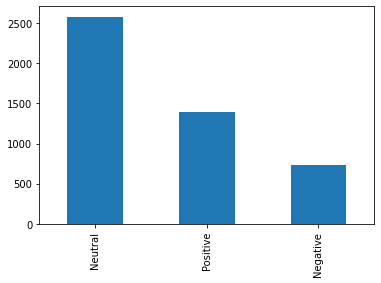

In [26]:
import matplotlib.pyplot as plt
tweet_stimulus['SentimentClass'].value_counts().plot(kind='bar', width=0.5)

In [15]:
X = tweet_stimulus.iloc[:, 4].values
y = tweet_stimulus.iloc[:, 3].values

In [16]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=250, min_df=7, max_df=0.8)
X = vectorizer.fit_transform(X).toarray()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [18]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4690, 250), (4690,), (4221, 250), (4221,), (469, 250), (469,))

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=0)
rfc.fit(X_train, y_train)
y_predRF = rfc.predict(X_test)
score_RF = rfc.score(X_test, y_test)
print(confusion_matrix(y_test,y_predRF))
print(classification_report(y_test,y_predRF))
print(accuracy_score(y_test, y_predRF) * 100)

[[252   3   7]
 [ 38  89   9]
 [ 42   6  23]]
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       262
           1       0.91      0.65      0.76       136
           2       0.59      0.32      0.42        71

    accuracy                           0.78       469
   macro avg       0.75      0.65      0.68       469
weighted avg       0.78      0.78      0.76       469

77.61194029850746


In [20]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_predSVC = svclassifier.predict(X_test)
score_SVC = svclassifier.score(X_test, y_test)
print(confusion_matrix(y_test,y_predSVC))
print(classification_report(y_test,y_predSVC))
print(accuracy_score(y_test, y_predSVC) * 100)

[[262   0   0]
 [ 49  83   4]
 [ 45   5  21]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       262
           1       0.94      0.61      0.74       136
           2       0.84      0.30      0.44        71

    accuracy                           0.78       469
   macro avg       0.84      0.64      0.68       469
weighted avg       0.81      0.78      0.75       469

78.03837953091684


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predNB = NB_model.predict(X_test)
score_NB = NB_model.score(X_test, y_test)
print(confusion_matrix(y_test,y_predNB))
print(classification_report(y_test,y_predNB))
print(accuracy_score(y_test, y_predNB) * 100)

[[247  14   1]
 [ 50  83   3]
 [ 46   4  21]]
              precision    recall  f1-score   support

           0       0.72      0.94      0.82       262
           1       0.82      0.61      0.70       136
           2       0.84      0.30      0.44        71

    accuracy                           0.75       469
   macro avg       0.79      0.62      0.65       469
weighted avg       0.77      0.75      0.73       469

74.84008528784648


In [22]:
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)
y_predLR = LR_model.predict(X_test)
score_LR = LR_model.score(X_test, y_test)
print(confusion_matrix(y_test,y_predLR))
print(classification_report(y_test,y_predLR))
print(accuracy_score(y_test, y_predLR) * 100)

[[257   2   3]
 [ 46  87   3]
 [ 44   6  21]]
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       262
           1       0.92      0.64      0.75       136
           2       0.78      0.30      0.43        71

    accuracy                           0.78       469
   macro avg       0.81      0.64      0.68       469
weighted avg       0.80      0.78      0.75       469

77.82515991471215


In [23]:
from sklearn.neighbors import KNeighborsClassifier #K nearest neighbors
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
y_predKNN = model_KNN.predict(X_test)
score_KNN = model_KNN.score(X_test,y_test)

print(confusion_matrix(y_test,y_predKNN))
print(classification_report(y_test,y_predKNN))
print(accuracy_score(y_test, y_predKNN) * 100)

[[244  12   6]
 [ 79  53   4]
 [ 61   1   9]]
              precision    recall  f1-score   support

           0       0.64      0.93      0.76       262
           1       0.80      0.39      0.52       136
           2       0.47      0.13      0.20        71

    accuracy                           0.65       469
   macro avg       0.64      0.48      0.49       469
weighted avg       0.66      0.65      0.60       469

65.2452025586354


In [24]:
from texttable import Texttable
# texttable takes the first reocrd in the list as the column names
# of the table
l = [["CLASSIFICATION", "ACCURACY"],['LogisticRegression', (score_LR * 100)],['RandomForest', (score_RF * 100)],['K-NearestNeighbors',(score_KNN * 100)],['MultinominalNaiveBayes',(score_NB * 100)], ['SupportVector', (score_SVC * 100)]]
table = Texttable()
table.add_rows(l)
print(table.draw())

+------------------------+----------+
|     CLASSIFICATION     | ACCURACY |
+========================+==========+
| LogisticRegression     | 77.825   |
+------------------------+----------+
| RandomForest           | 77.612   |
+------------------------+----------+
| K-NearestNeighbors     | 65.245   |
+------------------------+----------+
| MultinominalNaiveBayes | 74.840   |
+------------------------+----------+
| SupportVector          | 78.038   |
+------------------------+----------+
